# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path, index_col="Country")

temps_df

,City,AvgTemperatureFahrenheit,Date,Month,Year
Country,,,,,
Argentina,Buenos Aires,79.5,2000-01-01,1,2000
Argentina,Buenos Aires,78.8,2000-01-02,1,2000
Argentina,Buenos Aires,74.3,2000-01-03,1,2000
Argentina,Buenos Aires,79.0,2000-01-04,1,2000
Argentina,Buenos Aires,77.1,2000-01-05,1,2000
...,...,...,...,...,...
US,Washington,45.7,2019-12-27,12,2019
US,Washington,49.6,2019-12-28,12,2019
US,Washington,48.9,2019-12-29,12,2019


In [3]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [4]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

temps_df.insert(
    temps_df.columns.get_loc("AvgTemperatureFahrenheit") + 1,
    "AvgTemperatureCelsius",
    (temps_df["AvgTemperatureFahrenheit"] - 32) * 5 / 9
)
temps_df

,City,AvgTemperatureFahrenheit,AvgTemperatureCelsius,Date,Month,Year
Country,,,,,,
Argentina,Buenos Aires,79.5,26.388889,2000-01-01,1,2000
Argentina,Buenos Aires,78.8,26.000000,2000-01-02,1,2000
Argentina,Buenos Aires,74.3,23.500000,2000-01-03,1,2000
Argentina,Buenos Aires,79.0,26.111111,2000-01-04,1,2000
Argentina,Buenos Aires,77.1,25.055556,2000-01-05,1,2000
...,...,...,...,...,...,...
US,Washington,45.7,7.611111,2019-12-27,12,2019
US,Washington,49.6,9.777778,2019-12-28,12,2019
US,Washington,48.9,9.388889,2019-12-29,12,2019


In [5]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_cities_list = temps_df["City"].unique().tolist()

print(f"Number of unique cities: {len(unique_cities_list)}")
print("List of cities:", unique_cities_list)

# TODO: print a message with the number of unique countries and the list of them

Number of unique cities: 10
List of cities: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [ ]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df["Date"].min()  # done
max_date = temps_df["Date"].max()  # done

print(f"Min date: {min_date}")  
print(f"Max date: {max_date}")  

# TODO: print a message with the min and max dates

Min date: 2000-01-01
Max date: 2019-12-31


In [7]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = temps_df["AvgTemperatureCelsius"].idxmin()  # done
max_temp = temps_df["AvgTemperatureCelsius"].idxmax()  # done

min_temp_city = temps_df.loc[min_temp, "AvgTemperatureCelsius"]  # done
min_temp_date = temps_df.loc[max_temp, "AvgTemperatureCelsius"]  # done

max_temp_city =  temps_df.loc[min_temp, "City"]  # done
max_temp_date = temps_df.loc[max_temp, "City"]  # done

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date

print(f"Min temperature: {min_temp_city} °C in {max_temp_date} on {temps_df.loc[min_temp, 'Date']}")
print(f"Max temperature: {max_temp_city} °C in {min_temp_date} on {temps_df.loc[max_temp, 'Date']}")

Min temperature: Country
Germany    0.666667
Germany    1.611111
Germany   -0.555556
Germany    1.888889
Germany    6.000000
             ...   
Germany    2.722222
Germany   -1.333333
Germany   -3.166667
Germany   -2.277778
Germany    1.777778
Name: AvgTemperatureCelsius, Length: 7237, dtype: float64 °C in Country
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
         ...  
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
Egypt    Cairo
Name: City, Length: 7275, dtype: object on Country
Germany    2000-01-01
Germany    2000-01-02
Germany    2000-01-03
Germany    2000-01-04
Germany    2000-01-05
              ...    
Germany    2019-12-27
Germany    2019-12-28
Germany    2019-12-29
Germany    2019-12-30
Germany    2019-12-31
Name: Date, Length: 7237, dtype: object
Max temperature: Country
Germany    Munich
Germany    Munich
Germany    Munich
Germany    Munich
Germany    Munich
            ...  
Germany    Munich
Germany    Munich
Germany    Munic

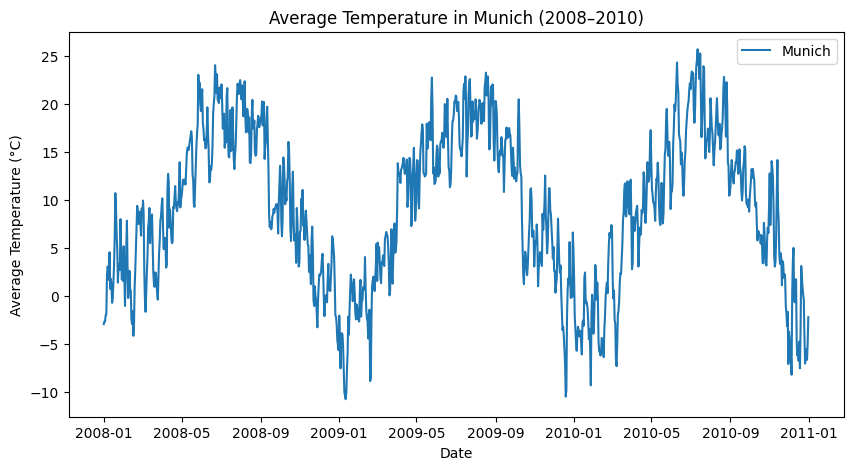

In [8]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df["City"] == city]          # done - get a dataframe with the rows of the selected city

city_df_period = city_df[
    (city_df["Date"] >= start_date) &
    (city_df["Date"] <= end_date)
]   # done - get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

plt.plot(
    city_df_period["Date"],
    city_df_period["AvgTemperatureCelsius"],
    label=city
)    # done - plot the line plot
plt.title(f"Average Temperature in {city} (2008–2010)")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()

plt.show()


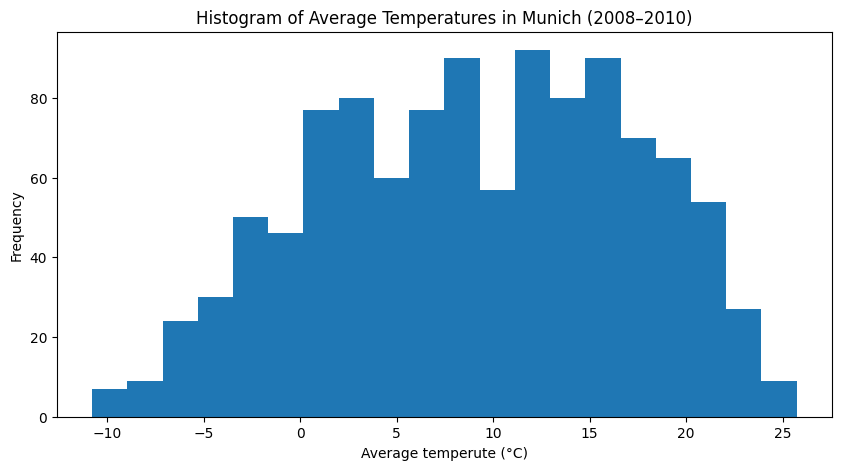

In [10]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

plt.hist(
    city_df_period["AvgTemperatureCelsius"],
    bins=20
)    # done: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20

plt.title(  
    f"Histogram of Average Temperatures in {city} (2008–2010)"
)   # done
plt.xlabel("Average temperute (°C)" )  # done
plt.ylabel("Frequency")  # TODO

plt.show()

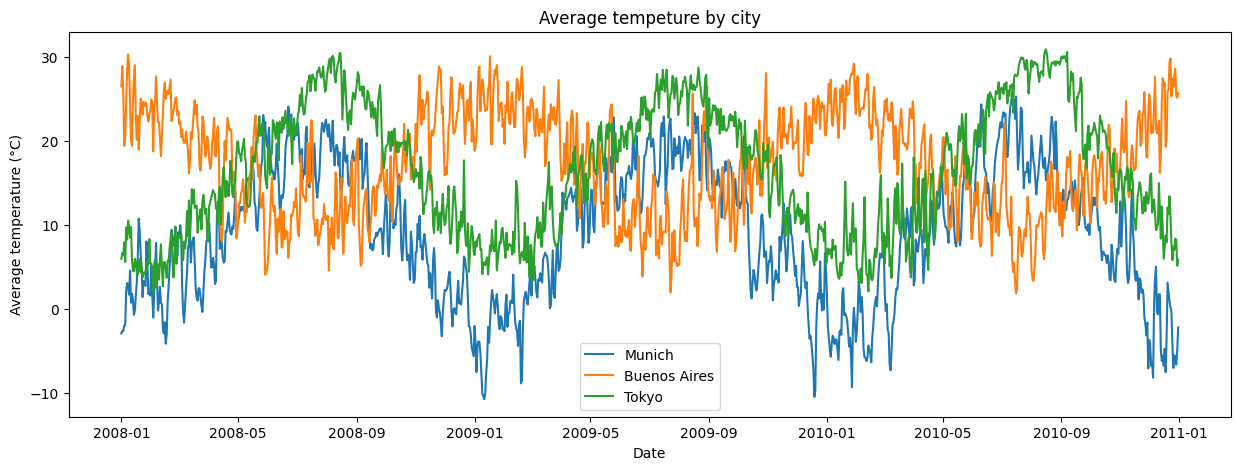

In [12]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]            # done: get a dataframe with the rows of the selected city
    
    city_df_period = city_df[
        (city_df["Date"] >= start_date) &
        (city_df["Date"] <= end_date)
    ]     # done: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
    plt.plot(
        city_df_period["Date"],
        city_df_period["AvgTemperatureCelsius"],
        label=city  
    )                # done - plot each city line and use the label parameter to set the legend name for each city

plt.title("Average tempeture by city")   # done
plt.xlabel("Date")  # done
plt.ylabel("Average temperature (°C)")  # done

plt.legend()

plt.show()

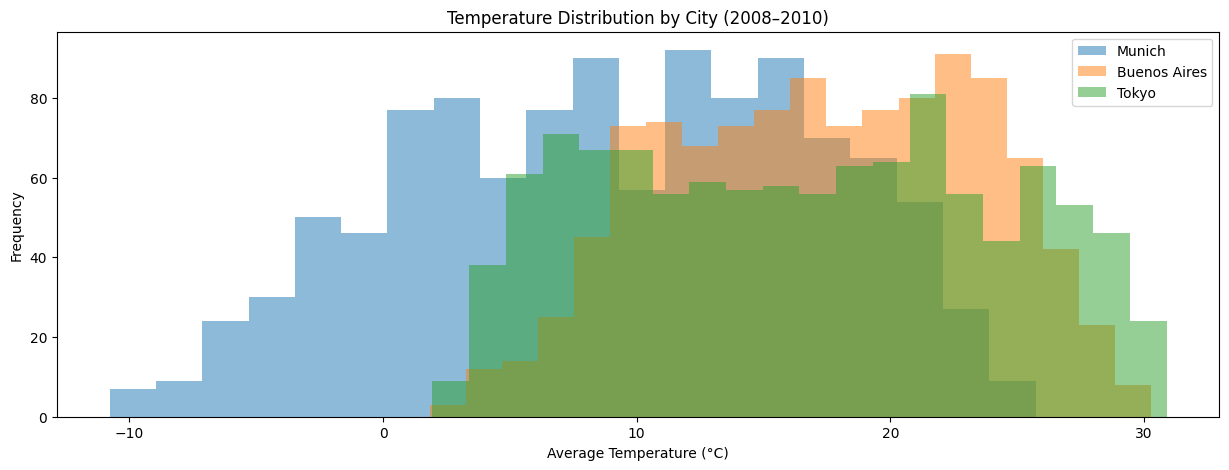

In [13]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df["City"]==city]            # done - get a dataframe with the rows of the selected city
    city_df_period = city_df[
        (city_df["Date"] >= start_date) &
        (city_df["Date"] <= end_date)
    ]     # done: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
    plt.hist(
        city_df_period["AvgTemperatureCelsius"],
        bins=20,
        alpha=0.5,
        label=city
    )                    # done: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 


plt.title("Temperature Distribution by City (2008–2010)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")

plt.legend()

plt.show()
